# # 그래프 가시화 정리

## - 데이터 가져오기

In [90]:
import pandas as pd

In [91]:
train = pd.read_csv('train.csv', index_col='PassengerId')

In [92]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## - 라이브러리 설정

In [93]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'

## - matplotlib으로 그리기

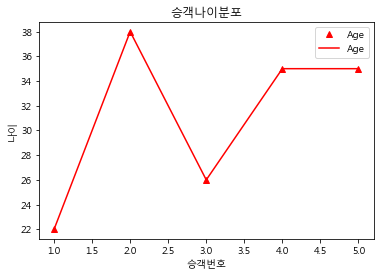

In [30]:
# x, y를 입력하여 그리기
plt.plot(train.head().index, train['Age'].head(), 'r^')
plt.plot(train.head().index, train['Age'].head(), 'r-')

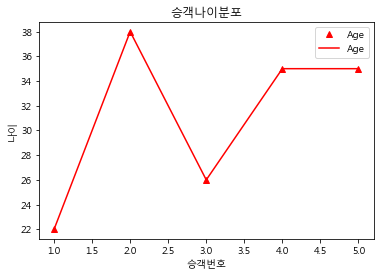

In [99]:
# x, y 대신에 Series(index 기준 value 값)로 그림
plt.plot(train['Age'].head(), 'r^')
plt.plot(train['Age'].head(), 'r-')
plt.xlabel('승객번호')
plt.ylabel('나이')
plt.title('승객나이분포')
plt.legend()

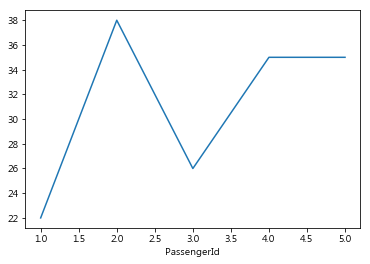

In [64]:
# Serise/DataFrame의 plot()
train['Age'].head().plot()

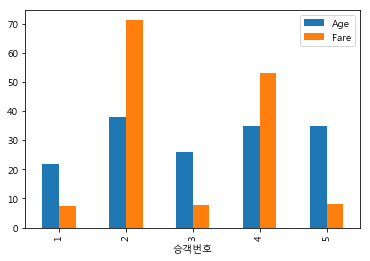

In [68]:
# kind=bar|line  stacked=True/False
train[['Age', 'Fare']].head().plot.bar()
plt.xlabel('승객번호')
plt.legend()

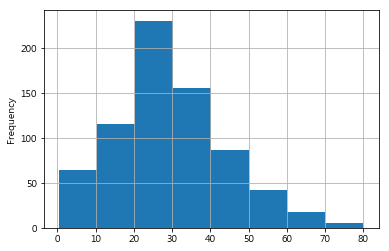

In [72]:
# 히스토그램(범위의 개수)
train['Age'].plot.hist(bins=8, grid=True)

## - seabon으로 쉽게 그리기

countplot (빈도 그래프)

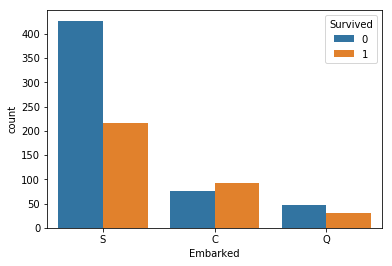

In [6]:
# 개수를 Y축으로 그래프 그림
sns.countplot(data=train, x='Embarked', hue='Survived')

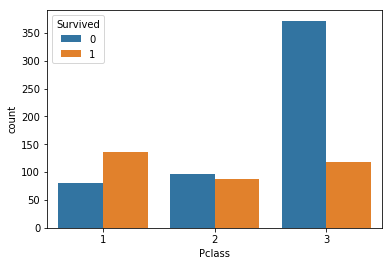

In [7]:
# 개수를 Y축으로 그래프 그림
sns.countplot(data=train, x='Pclass', hue='Survived')

barplot, pointplot (평균 그래프)

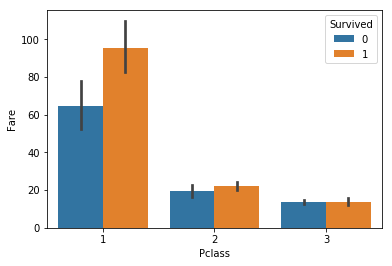

In [9]:
# y의 평균값과 분산을 그래프로 그림
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

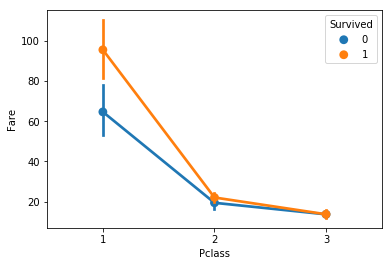

In [11]:
# barplt과 동일함
sns.pointplot(data=train, x='Pclass', y='Fare', hue='Survived')

distplot(분산, 챠트)

c:\users\kitri_011\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


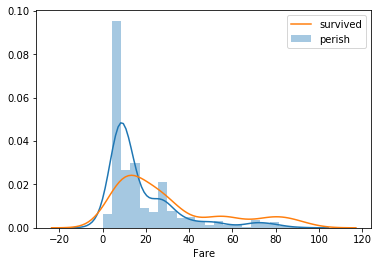

In [13]:
# 분산 챠트
low_fare = train[train['Fare'] < 100]

perish = low_fare[low_fare['Survived'] == 0]
survived = low_fare[low_fare['Survived'] == 1]

sns.distplot(perish['Fare'], hist=True, label='perish')
sns.distplot(survived['Fare'], hist=False, label='survived')

lmplot (선점형, 산포 그래프)

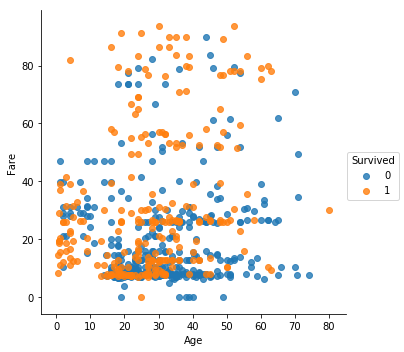

In [14]:
low_fare = train[train['Fare'] < 100]

sns.lmplot(data=low_fare, x='Age', y='Fare', hue='Survived', fit_reg=False)

## - 복합챠트 그리기

In [15]:
import matplotlib.pyplot as plt

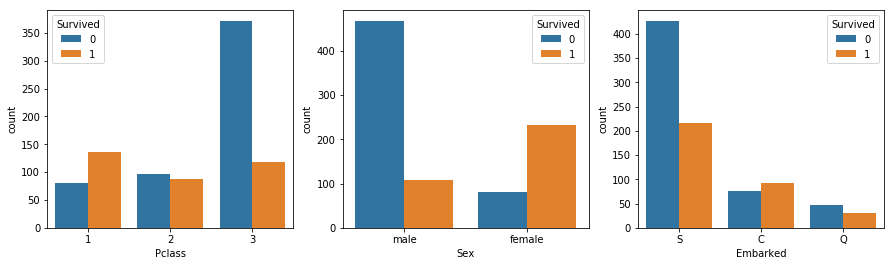

In [16]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(15, 4)

sns.countplot(data=train, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax3)

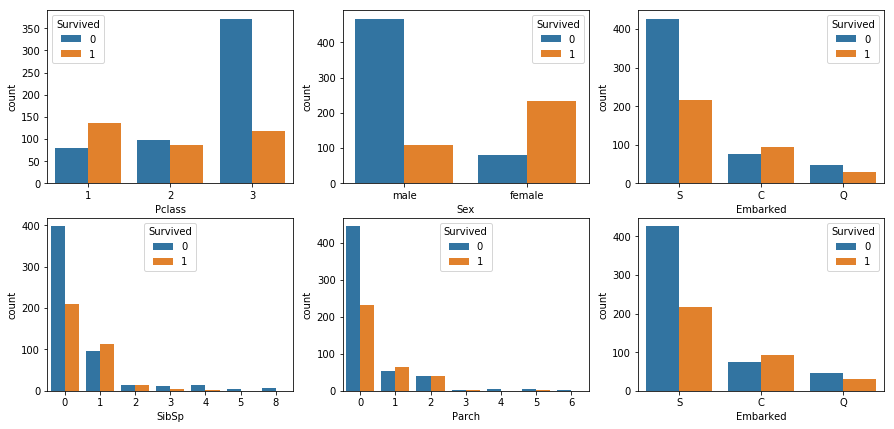

In [17]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(15, 7)

sns.countplot(data=train, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax3)
sns.countplot(data=train, x='SibSp', hue='Survived', ax=ax4)
sns.countplot(data=train, x='Parch', hue='Survived', ax=ax5)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax6)

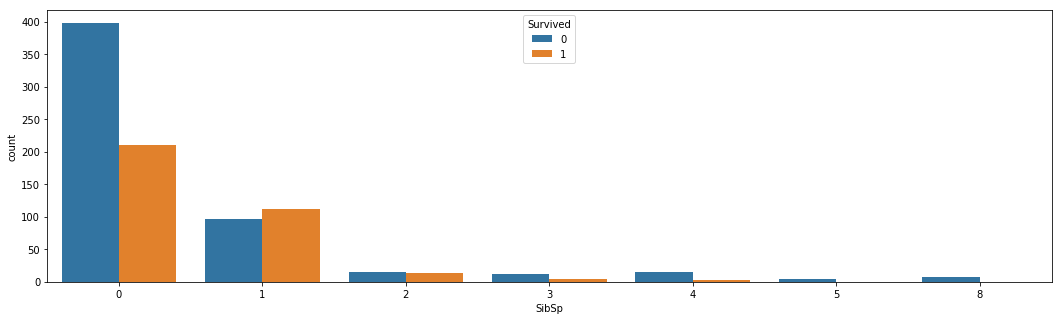

In [18]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 5)

sns.countplot(data=train, x='SibSp', hue='Survived')
